In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Мы будем работать с данными агрегатора такси [Sigma Cabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов. 

In [67]:
df = pd.read_csv('sigma_cabs.csv')
df.shape

(131662, 14)

In [68]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


### EDA 
Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. Изобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, примените `One-Hot-Encoding` для них. Не забудьте в методе `pd.get_dummies` указать параметр `drop_first=True`.

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3'],
      dtype='object') Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')


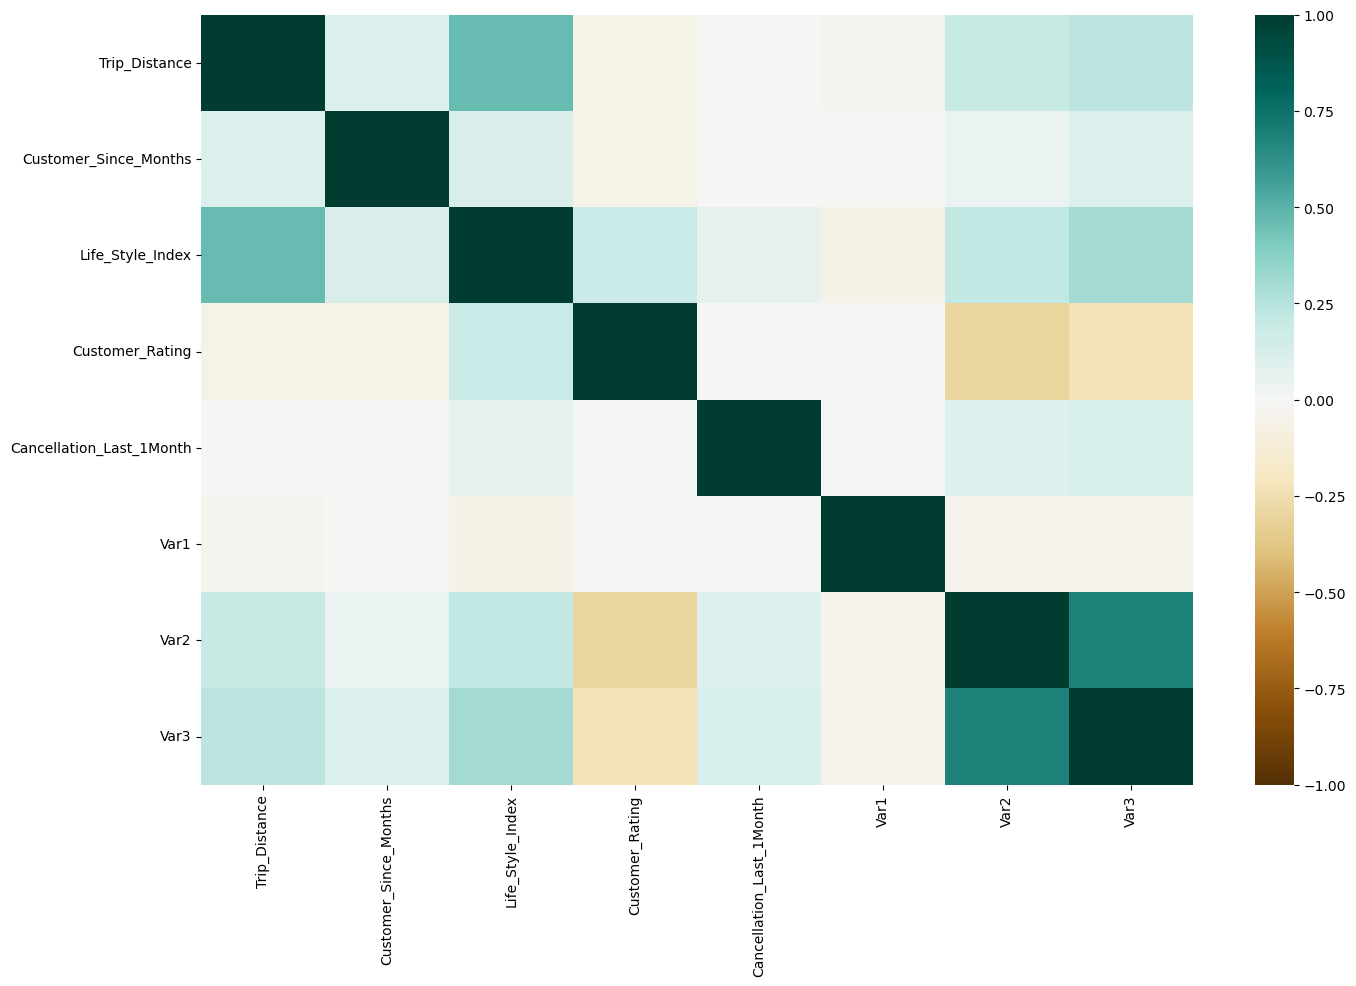

In [69]:
### Your code is here
y = df['Surge_Pricing_Type']
df = df.drop('Surge_Pricing_Type', axis=1)


numeric_columns = df.loc[:,df.dtypes!=np.object].columns
categorical_columns = df.loc[:,df.dtypes==np.object].columns
print(numeric_columns, categorical_columns)

for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())
           
for col in categorical_columns:
    most_recent = df.groupby(col).size().sort_values().index[-1]
    df[col] = df[col].fillna(most_recent)
    
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(df[numeric_columns].corr(), 
            xticklabels=numeric_columns,
            yticklabels=numeric_columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [70]:
df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019
std,25.522882,3.544410,0.207760,0.980675,1.037559,14.807523,4.986142,11.578278
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000
25%,24.580000,3.000000,2.687952,2.152500,0.000000,64.000000,48.000000,67.000000
50%,38.200000,6.016661,2.802064,2.895000,0.000000,64.202698,50.000000,74.000000
75%,60.730000,10.000000,2.912815,3.582500,1.000000,64.202698,54.000000,82.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000


In [71]:
df.describe(include='object')

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,131662,131662,131662,131662
unique,5,3,14,2
top,B,B,A,Male
freq,51346,60548,77597,93900


In [72]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(round(get_top_abs_correlations(df[numeric_columns], 5), 3))

Top Absolute Correlations
Var2              Var3                0.683
Trip_Distance     Life_Style_Index    0.468
Life_Style_Index  Var3                0.303
Customer_Rating   Var2                0.303
Trip_Distance     Var3                0.232
dtype: float64


In [73]:
cat_dummies = pd.get_dummies(df[categorical_columns], 
                                drop_first=True)
    
df = pd.concat((df, cat_dummies), axis=1)
df = df.drop(categorical_columns, axis=1)



In [74]:
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()


(131662, 28)


,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.427690,3.90500,0,40.000000,46,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T0005689461,29.47,10.0,2.782450,3.45000,0,38.000000,56,78,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
T0005689464,41.58,10.0,2.802064,3.50125,2,64.202698,56,77,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
T0005689465,61.56,10.0,2.802064,3.45375,0,64.202698,52,74,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
T0005689467,54.95,10.0,3.034530,3.40250,4,51.000000,49,102,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Training

In [75]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [77]:
X = df
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

**Задание 1.** Обучите One-vs-Rest Logreg. Не забудьте в шаг добавить стандартизацию данных (через `StandardScaler`) Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg. Здесь и далее округляйте до 3 знака после запятой.

Чтобы отдельно и долго не вычислять метрики, можно воспользоваться `classification_report` из `sklearn.metrics`!

In [88]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### Your code is here
pipe = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_all", OneVsRestClassifier(estimator=LogisticRegression()))])
pipe.fit(X_train, y_train)
print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.722     0.542     0.619      5372
           2      0.636     0.835     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()` из предложенных. Для лучшего набора гиперпараметров посчитайте те же самые метрики. Валидировать параметры необходимо по `accuracy`. В этот раз проведем настояющую процедуру Кросс-Валидации! 

Для этого в метод `fit` передадим тренировочную часть наших данных, в параметр `cv` ничего не будем передавать (по дефолту 5-fold Кросс-Валидация будет проведена), а итоговые метрики замерим на тесте!

In [89]:
param_grid = {'one_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'one_vs_all__estimator__C': [0.001, 0.01, 0.1, 1]}

In [90]:
### Your code is here
from sklearn.model_selection import GridSearchCV


search = GridSearchCV(pipe, param_grid)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)


Best parameter (CV score=0.68075):
{'one_vs_all__estimator__C': 0.001, 'one_vs_all__estimator__penalty': 'l2'}


In [91]:
print(classification_report(y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.741     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.576     0.648      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



Изобразите три калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest. Хорошо ли откалиброван обученный классификатор? 

Заметьте, что `predict_proba` возвращает список из вероятностей для всех наших классов!

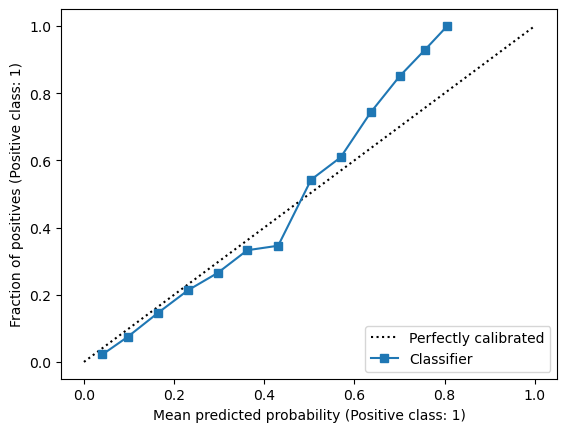

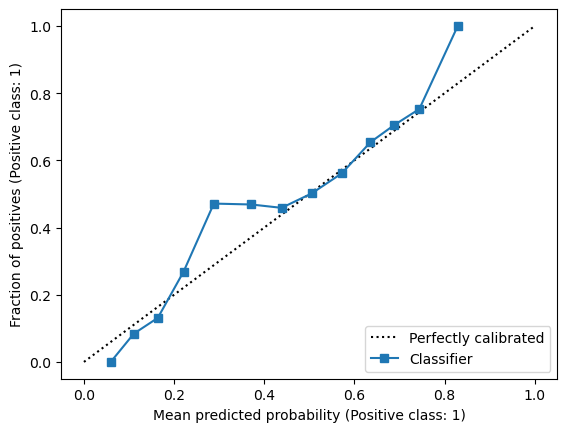

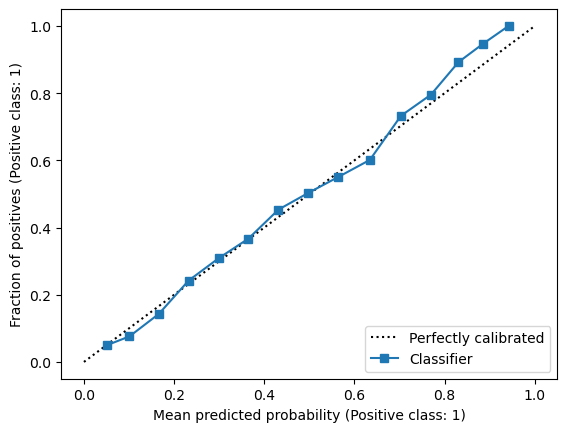

In [97]:
### Your code is here

from sklearn.calibration import CalibrationDisplay
### Your code is here
for i in range(1, 4):
    i_vs_rest = y_test.copy()
    for idx in range(len(y_test)):
        if y_test[idx] != i:
            i_vs_rest[idx] = 0
        else:
            i_vs_rest[idx] = 1
    CalibrationDisplay.from_predictions(i_vs_rest, search.predict_proba(X_test)[:, i - 1], n_bins=15)

**Задание 2.** Обучите логистическую регрессию с гиперпараметрами из первого задания на полиномиальных признаках до 4 степени. Сравните метрики с первым заданием.


Пример: Пусть у нас был единственный признак 

$$
d_j = [1, 2, 3, 4]
$$

Тогда полиномиальные признаки до 4 степени от такого будут иметь вид:

$$
d_j^1 = [1, 2, 3, 4]
$$

$$
d_j^2 = [1, 4, 9, 16]
$$

$$
d_j^3 = [1, 8, 27, 64]
$$

$$
d_j^4 = [1, 16, 81, 256]
$$

P.S. Бинарные колонки нет смысла возводить в какие-то степени, поэтому возьмем исключительно вещественные из базовых. 

Для этого можно воспользоваться классическим циклом (или уроком из занятия про `Sberbank Housing Market`). Положите модифицированный датасет в переменную `X_polinomial`!

P.S.S Зачастую еще, создаваю полиномиальные фичи, учитывают "пересечения" признаков, то есть, например, из векторов признаков $d_j, d_i$ генерируют не просто новые степени $d_j^2, d_i^2, d_j^3, d_i^3...$, а еще и признаки вида $d_j \cdot d_i, d_j^2 \cdot d_i, d_j \cdot d_i^2...$, но здесь ограничьтесь просто степенями!

In [104]:
### Создание полиномиальных признаков

X_polinomial = X.copy()


### Your code is here
for power in range(2, 5):
    for col in numeric_columns:
        pow_col = (X_polinomial[col] ** power).to_frame().rename({col:f"{col}_{power}"}, axis=1)
        X_polinomial = pd.concat((X_polinomial, pow_col), axis=1) 

In [105]:
X_polinomial.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male,Trip_Distance_2,Customer_Since_Months_2,Life_Style_Index_2,Customer_Rating_2,Cancellation_Last_1Month_2,Var1_2,Var2_2,Var3_2,Trip_Distance_3,Customer_Since_Months_3,Life_Style_Index_3,Customer_Rating_3,Cancellation_Last_1Month_3,Var1_3,Var2_3,Var3_3,Trip_Distance_4,Customer_Since_Months_4,Life_Style_Index_4,Customer_Rating_4,Cancellation_Last_1Month_4,Var1_4,Var2_4,Var3_4
Trip_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.427690,3.90500,0,40.000000,46,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.8329,1.0,5.893679,15.249025,0,1600.000000,2116,3600,310.288733,1.0,14.308025,59.547443,0,64000.000000,97336,216000,2.100655e+03,1.0,34.735449,232.532763,0,2.560000e+06,4477456,12960000
T0005689461,29.47,10.0,2.782450,3.45000,0,38.000000,56,78,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,868.4809,100.0,7.742028,11.902500,0,1444.000000,3136,6084,25594.132123,1000.0,21.541806,41.063625,0,54872.000000,175616,474552,7.542591e+05,10000.0,59.938998,141.669506,0,2.085136e+06,9834496,37015056
T0005689464,41.58,10.0,2.802064,3.50125,2,64.202698,56,77,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1728.8964,100.0,7.851563,12.258752,4,4121.986462,3136,5929,71887.512312,1000.0,22.000581,42.920954,8,264642.652988,175616,456533,2.989083e+06,10000.0,61.647036,150.276990,16,1.699077e+07,9834496,35153041
T0005689465,61.56,10.0,2.802064,3.45375,0,64.202698,52,74,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3789.6336,100.0,7.851563,11.928389,0,4121.986462,2704,5476,233289.844416,1000.0,22.000581,41.197674,0,264642.652988,140608,405224,1.436132e+07,10000.0,61.647036,142.286466,0,1.699077e+07,7311616,29986576
T0005689467,54.95,10.0,3.034530,3.40250,4,51.000000,49,102,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3019.5025,100.0,9.208372,11.577006,16,2601.000000,2401,10404,165921.662375,1000.0,27.943082,39.390764,64,132651.000000,117649,1061208,9.117395e+06,10000.0,84.794121,134.027074,256,6.765201e+06,5764801,108243216


In [106]:
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, y, 
                                                             test_size=0.2, 
                                                             shuffle=True, 
                                                             random_state=2022)

In [113]:
### Your code is here

pipe_pol = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_all", OneVsRestClassifier(estimator=LogisticRegression()))])
pipe_pol.set_params(one_vs_all__estimator__C=0.001, one_vs_all__estimator__penalty='l2')

pipe_pol.fit(X_pol_train, y_train)
print(classification_report(y_test, pipe_pol.predict(X_pol_test), digits=3))

              precision    recall  f1-score   support

           1      0.748     0.532     0.622      5372
           2      0.636     0.837     0.723     11349
           3      0.741     0.585     0.653      9612

    accuracy                          0.683     26333
   macro avg      0.708     0.651     0.666     26333
weighted avg      0.697     0.683     0.677     26333



In [109]:
print(classification_report(y_test, search_pol.predict(X_pol_test), digits=3))

              precision    recall  f1-score   support

           1      0.739     0.544     0.627      5372
           2      0.637     0.834     0.722     11349
           3      0.743     0.582     0.653      9612

    accuracy                          0.683     26333
   macro avg      0.707     0.653     0.667     26333
weighted avg      0.697     0.683     0.677     26333



По аналогии с первым заданием изобразите три калибровочные кривые. Стало ли лучше?

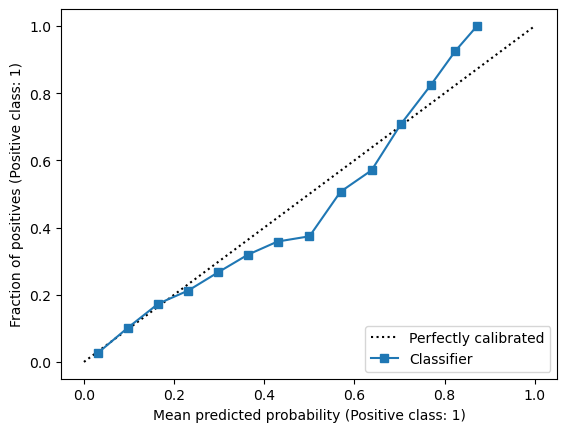

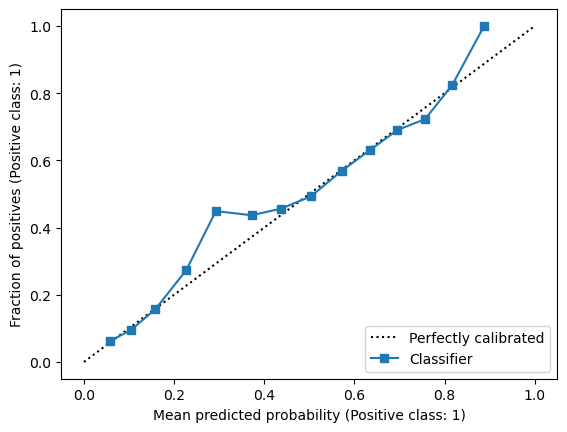

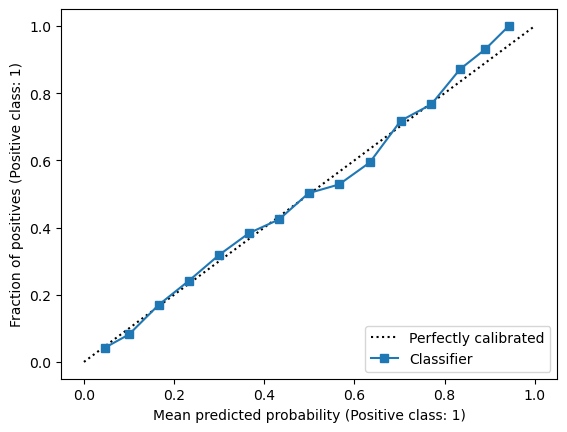

In [115]:
### Your code is here

for i in range(1, 4):
    i_vs_rest = y_test.copy()
    for idx in range(len(y_test)):
        if y_test[idx] != i:
            i_vs_rest[idx] = 0
        else:
            i_vs_rest[idx] = 1
    CalibrationDisplay.from_predictions(i_vs_rest, search_pol.predict_proba(X_pol_test)[:, i - 1], n_bins=15)

**Задание 3.** Обучите на датасете без полиномиальных признаков One-vs-One `SGDClassifier` из `sklearn.linear_model`, который использует стохастический градиентный спуск (узнаете о нем позже) и может обучать как `SVM`, так и, например, `LogReg`, если указать в качестве параметра `loss` либо `hinge`, либо `log` соответственно!

Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg.

In [116]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

In [124]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

### Your code is here
pipe_one_one = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_one", OneVsOneClassifier(estimator=SGDClassifier()))])
pipe_one_one.fit(X_train, y_train)
print(classification_report(y_test, pipe_one_one.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.730     0.528     0.613      5372
           2      0.625     0.867     0.727     11349
           3      0.762     0.532     0.626      9612

    accuracy                          0.676     26333
   macro avg      0.706     0.642     0.655     26333
weighted avg      0.697     0.676     0.667     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()`. При этом переберите всевозможные функции потерь. Таким образом, при `loss = 'hinge'`, мы обучим SVM, при `loss = 'log'` мы обучим логистическую регрессию и т.д.

Используйте прием с Кросс-Валидацией при подборе параметров, как ранее, а также замерьте метрики на тесте.

In [125]:
param_grid = {'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_one__estimator__penalty': ['l1', 'l2'],
              'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1]}

In [126]:
### Your code is here

search = GridSearchCV(pipe_one_one, param_grid)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)



Best parameter (CV score=0.68084):
{'one_vs_one__estimator__alpha': 0.001, 'one_vs_one__estimator__loss': 'hinge', 'one_vs_one__estimator__penalty': 'l1'}


In [127]:
print(classification_report(y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.743     0.529     0.618      5372
           2      0.625     0.876     0.730     11349
           3      0.768     0.526     0.625      9612

    accuracy                          0.678     26333
   macro avg      0.712     0.644     0.658     26333
weighted avg      0.701     0.678     0.669     26333



Можно ли однозначно сказать, какой подход оказался лучше: One-vs-Rest или One-vs-One?